# Specifying a joint distribution via conditional distribution and marginal distributions

Be sure to import Symbulate using the following commands.

In [1]:
from symbulate import *
%matplotlib inline

The joint distribution fully specifies the conditional and marginal distributions, and so conditioning can be used when the joint distribution is specified.  However, in many situations we specify a joint distribution indirectly by specifying appropriate conditional and marginal distributions.  Such a specification can be made in Symbulate using a custom `ProbabilitySpace`.

*Example.* Suppose that $X$ has a Uniform(0,1) distribution and that, given $X=x$, $Y$ has a Binomial(10, $x$) distribution.

First define the joint distribution of $X$ and $Y$ using a custom probability space.  We first draw a value `x` from a Uniform(0,1) distribution.  Then we draw a value `y` from a Binomial(10, `x`) distributions.

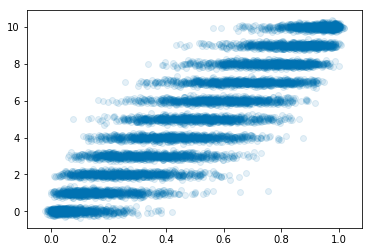

In [16]:
def binomial_given_uniform():
    x = Uniform(0,1).draw()
    y = Binomial(10, x).draw()
    return x, y

X, Y = RV(ProbabilitySpace(binomial_given_uniform))

(X & Y).sim(10000).plot(jitter=True, alpha=0.1)

Use the joint distribution to simulate the conditional distribution of $Y$ given $X=0.3$ (and compare to Binomial(10, 0.3)).

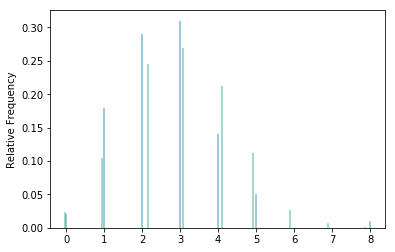

In [17]:
(Y | (abs(X - 0.3) < 0.01) ).sim(100).plot()
RV(Binomial(10, 0.3)).sim(1000).plot(jitter=True)

Simulate the conditional distribution of $X$ given $Y=3$.

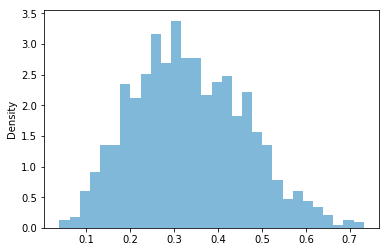

In [18]:
(X | (Y == 3) ).sim(1000).plot()